<a href="https://colab.research.google.com/github/moxie77/simple_SVR/blob/main/svr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
upl = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline
sns.set()

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')

In [10]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [12]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [13]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [14]:
y = y.reshape(len(y),1)

In [15]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [16]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

In [17]:
x = sc_x.fit_transform(x)

In [18]:
sc_y = StandardScaler()

In [19]:
y = sc_y.fit_transform(y)

In [20]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [21]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [22]:
from sklearn.svm import SVR

In [23]:
svr_reg = SVR(kernel='rbf')

In [24]:
svr_reg.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [30]:
pred_salary = svr_reg.predict(sc_x.transform([[6.5]]))

In [32]:
sc_y.inverse_transform(pred_salary.reshape(len(pred_salary), 1))

array([[170370.0204065]])

Text(0, 0.5, 'Salary')

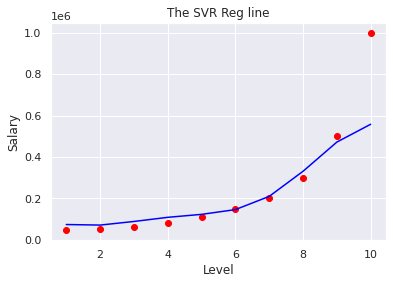

In [36]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color="red")
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(svr_reg.predict(x).reshape(len(x),1)), color='blue')
plt.title("The SVR Reg line")
plt.xlabel("Level")
plt.ylabel("Salary")